<a href="https://colab.research.google.com/github/nlan082/BAINHOM/blob/main/AI_6_5_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Số lượng ảnh huấn luyện: Dataset này có hơn 1,600 ảnh, đáp ứng yêu cầu tối thiểu 100 ảnh trước khi tăng cường dữ liệu.
#Số loại lỗi: Có ít nhất 3 loại lỗi khác nhau trong dataset này, bao gồm các loại hư hỏng như rách, méo mó, hoặc thiếu mã vạch.
#Nguồn: Roboflow Universe

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Damaged Box Detection.zip.zip to Damaged Box Detection.zip.zip


In [ ]:

# Giải nén tệp zip đã tải
zip_file_path = list(uploaded.keys())[0]
extract_folder = '/content/extracted_folder/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Giải nén thành công!")


Giải nén thành công!


In [ ]:
pip install tensorflow roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn dữ liệu huấn luyện và kiểm tra
train_dir = '/content/extracted_folder/train'
valid_dir = '/content/extracted_folder/valid'

# Tiền xử lý và tăng cường dữ liệu (augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Tạo generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Xây dựng mô hình CNN có BatchNormalization và Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 32
)

# Lưu mô hình
model.save('damaged_box_detection_model.h5')

# Đánh giá độ chính xác
test_loss, test_acc = model.evaluate(valid_generator, steps=valid_generator.samples // 32)
print(f"\n✅ Độ chính xác trên tập kiểm tra: {test_acc:.4f}")


Found 3744 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 58s 456ms/step - accuracy: 0.5506 - loss: 4.4225 - val_accuracy: 0.5104 - val_loss: 12.9494
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 53s 451ms/step - accuracy: 0.5943 - loss: 0.9616 - val_accuracy: 0.4965 - val_loss: 1.8559
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 453ms/step - accuracy: 0.5981 - loss: 0.7379 - val_accuracy: 0.5104 - val_loss: 1.5959
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 452ms/step - accuracy: 0.6069 - loss: 0.6857 - val_accuracy: 0.5174 - val_loss: 0.7566
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 53s 455ms/step - accuracy: 0.5966 - loss: 0.6514 - val_accuracy: 0.5139 - val_loss: 3.9747
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 53s 449ms/step - accuracy: 0.6107 - loss: 0.6350 - val_accuracy: 0.4965 - val_loss: 0.6992
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 448ms/step - accuracy: 0.6189 - loss: 0.7050 - val_accuracy: 0.4965 - val_loss: 0.6974
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 446ms/step - accuracy: 0.6257 - loss: 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7082 - loss: 0.5856

✅ Độ chính xác trên tập kiểm tra: 0.7014


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


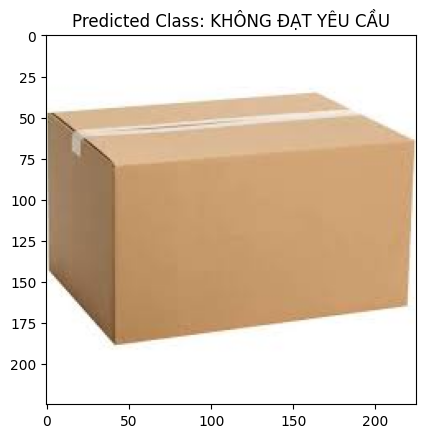

Kết quả dự đoán: KHÔNG ĐẠT YÊU CẦU


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Tải mô hình đã lưu
model = load_model('damaged_box_detection_model.h5')  # Đảm bảo đường dẫn đúng

def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Đọc ảnh màu
    img = cv2.resize(img, (224, 224))  # Resize ảnh về kích thước 224x224
    img = img.astype('float32') / 255  # Chuẩn hóa ảnh
    return img

def predict_digit(image_path):
    img = preprocess_image(image_path)
    img = img.reshape(1, 224, 224, 3)  # Reshape để phù hợp với đầu vào của mô hình
    prediction = model.predict(img)

    # Dự đoán lớp nhị phân (hư hỏng / không hư hỏng)
    predicted_class = (prediction > 0.5).astype(int)  # Lớp dự đoán (0 hoặc 1)

    # Chuyển đổi lớp thành 'ĐẠT YÊU CẦU' hoặc 'KHÔNG ĐẠT YÊU CẦU'
    result = "ĐẠT YÊU CẦU" if predicted_class[0][0] == 1 else "KHÔNG ĐẠT YÊU CẦU"

    img = cv2.imread(image_path)  # Đọc lại ảnh gốc để hiển thị
    plt.imshow(img[:,:,::-1])  # Hiển thị ảnh (đảo màu BGR sang RGB)
    plt.title(f'Predicted Class: {result}')  # Tiêu đề với kết quả dự đoán
    plt.show()

    return result  # Trả về kết quả "ĐẠT YÊU CẦU" hoặc "KHÔNG ĐẠT YÊU CẦU"

# Đường dẫn tới ảnh
image_path = '/content/KO MA QR.jpg'
predicted_result = predict_digit(image_path)
print(f"Kết quả dự đoán: {predicted_result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


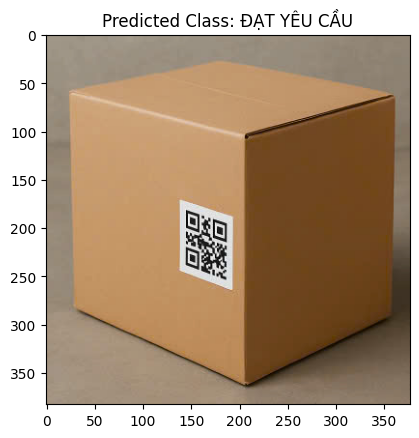

Kết quả dự đoán: ĐẠT YÊU CẦU


In [ ]:
image_path = '/content/Thung dat yeu cau.jpg'
predicted_result = predict_digit(image_path)
print(f"Kết quả dự đoán: {predicted_result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


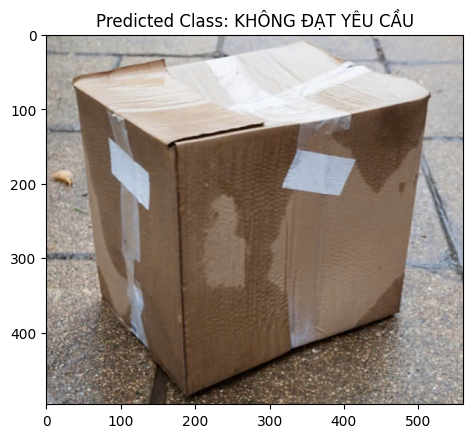

Kết quả dự đoán: KHÔNG ĐẠT YÊU CẦU


In [ ]:
image_path = '/content/Thùng dơ.jpg'
predicted_result = predict_digit(image_path)
print(f"Kết quả dự đoán: {predicted_result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


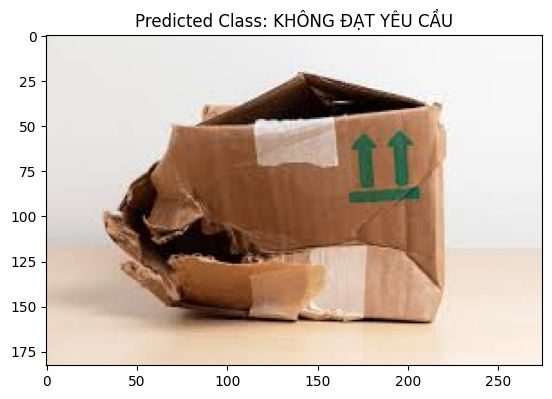

Kết quả dự đoán: KHÔNG ĐẠT YÊU CẦU


In [ ]:
image_path = '/content/thùng rách.jpg'
predicted_result = predict_digit(image_path)
print(f"Kết quả dự đoán: {predicted_result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


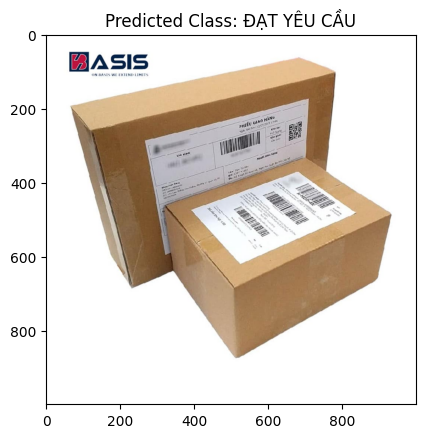

Kết quả dự đoán: ĐẠT YÊU CẦU


In [ ]:
image_path = '/content/day.jpeg'
predicted_result = predict_digit(image_path)
print(f"Kết quả dự đoán: {predicted_result}")